In [1]:
from pycaret.datasets import get_data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mlflow

In [2]:
all_datasets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


In [3]:
df = get_data('glass')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


[]

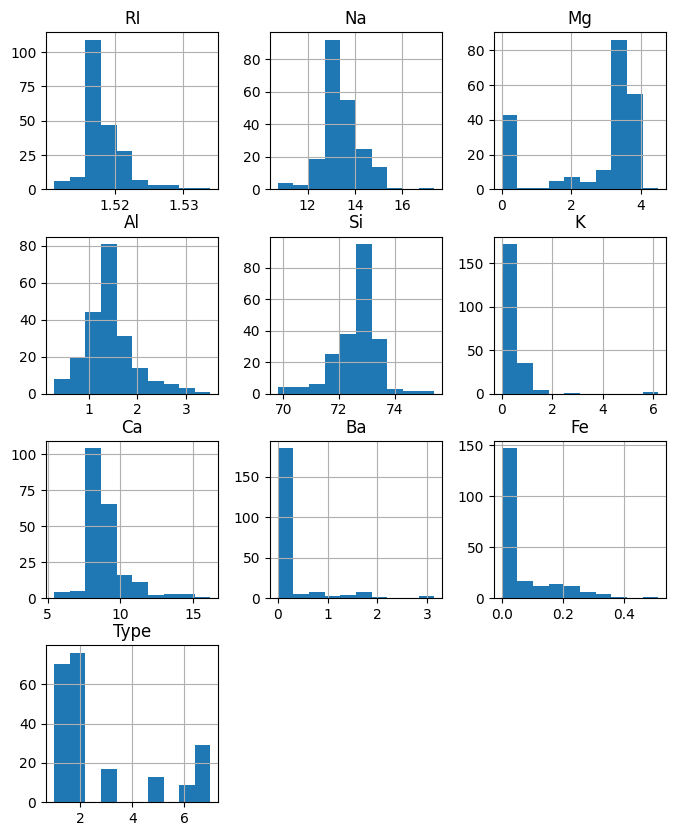

In [4]:
df.hist(figsize = (8, 10))
plt.plot()

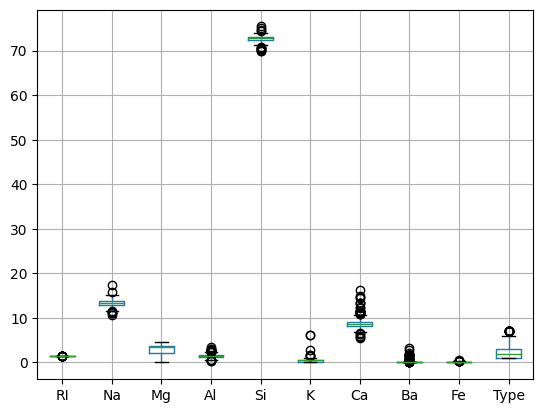

In [5]:
df.boxplot()
plt.show()

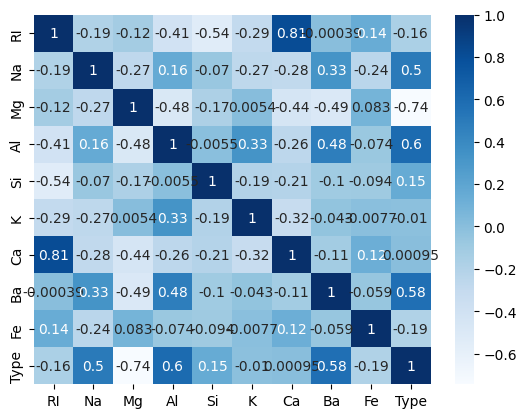

In [6]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.show()

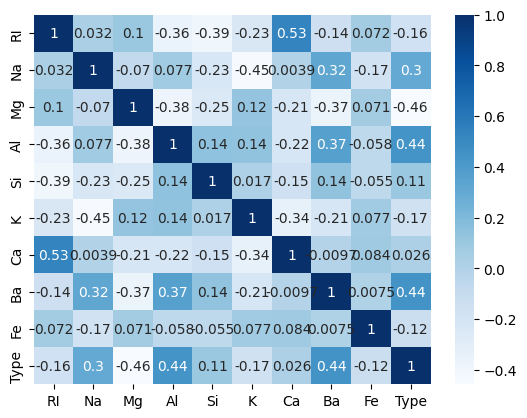

In [7]:
sns.heatmap(df.corr(method = 'kendall'), annot = True, cmap = 'Blues')
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
mlflow.autolog()

2024/03/02 14:52:25 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/03/02 14:52:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


In [13]:
from pycaret.classification import *

s = setup(df, target = 'Type', session_id = 1212,
           log_experiment = True, experiment_name = 'glass_0')

,Description,Value
0,Session id,1212
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(214, 10)"
5,Transformed data shape,"(214, 10)"
6,Transformed train set shape,"(149, 10)"
7,Transformed test set shape,"(65, 10)"
8,Numeric features,9
9,Preprocess,True


In [14]:
model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:57:57
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7652,0.0000,0.7652,0.7639,0.7470,0.6743,0.6899,0.0970
rf,Random Forest Classifier,0.7510,0.0000,0.7510,0.7525,0.7321,0.6518,0.6695,0.1240
gbc,Gradient Boosting Classifier,0.7105,0.0000,0.7105,0.7005,0.6869,0.5938,0.6094,0.4240
lightgbm,Light Gradient Boosting Machine,0.6976,0.0000,0.6976,0.7128,0.6828,0.5807,0.5973,13.7410
knn,K Neighbors Classifier,0.6786,0.0000,0.6786,0.6462,0.6346,0.5418,0.5695,0.0330
lr,Logistic Regression,0.6233,0.0000,0.6233,0.5757,0.5812,0.4613,0.4807,0.1590
lda,Linear Discriminant Analysis,0.6176,0.0000,0.6176,0.6218,0.5955,0.4725,0.4882,0.0320
ridge,Ridge Classifier,0.6171,0.0000,0.6171,0.5482,0.5684,0.4539,0.4690,0.0350
dt,Decision Tree Classifier,0.5905,0.0000,0.5905,0.6422,0.5952,0.4538,0.4660,0.0350
ada,Ada Boost Classifier,0.4433,0.0000,0.4433,0.3236,0.3513,0.2139,0.2534,0.0940


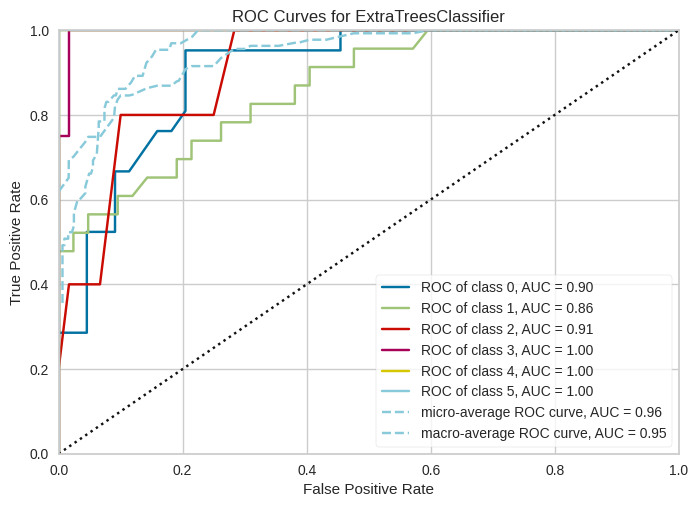

In [16]:
plot_model(model, plot = 'auc')

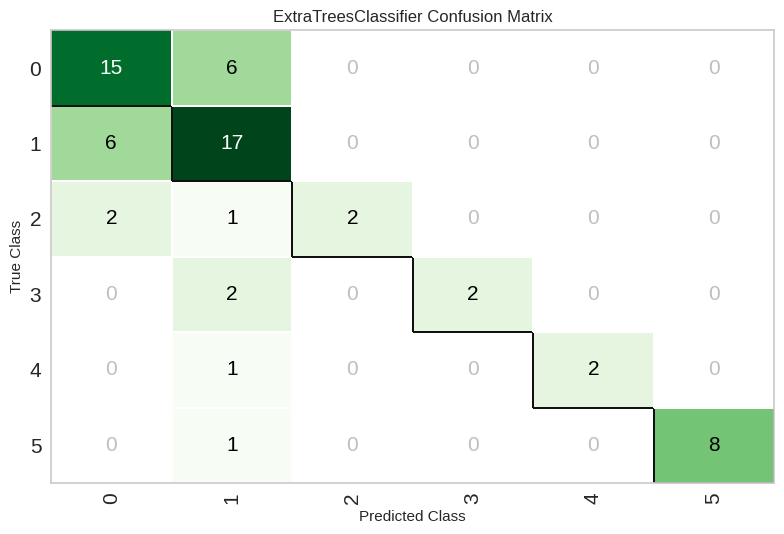

In [18]:
plot_model(model, plot = 'confusion_matrix')

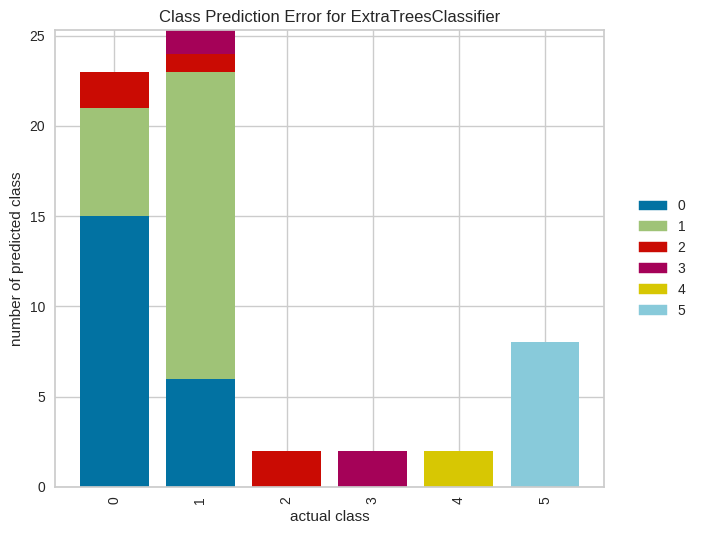

In [19]:
plot_model(model, plot = 'error')

In [25]:
predictions = predict_model(model, data = df)
predictions.head(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9112,0.9920,0.9112,0.9154,0.9117,0.8780,0.8787


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,prediction_label,prediction_score
0,1.52101,13.64,4.49,1.10,71.779999,0.06,8.75,0.0,0.00,1,1,1.00
1,1.51761,13.89,3.60,1.36,72.730003,0.48,7.83,0.0,0.00,1,2,0.53
2,1.51618,13.53,3.55,1.54,72.989998,0.39,7.78,0.0,0.00,1,1,1.00
3,1.51766,13.21,3.69,1.29,72.610001,0.57,8.22,0.0,0.00,1,1,1.00
4,1.51742,13.27,3.62,1.24,73.080002,0.55,8.07,0.0,0.00,1,1,1.00
5,1.51596,12.79,3.61,1.62,72.970001,0.64,8.07,0.0,0.26,1,2,0.51
6,1.51743,13.30,3.60,1.14,73.089996,0.58,8.17,0.0,0.00,1,1,1.00
7,1.51756,13.15,3.61,1.05,73.239998,0.57,8.24,0.0,0.00,1,1,1.00
8,1.51918,14.04,3.58,1.37,72.080002,0.56,8.30,0.0,0.00,1,2,0.45
9,1.51755,13.00,3.60,1.36,72.989998,0.57,8.40,0.0,0.11,1,1,1.00


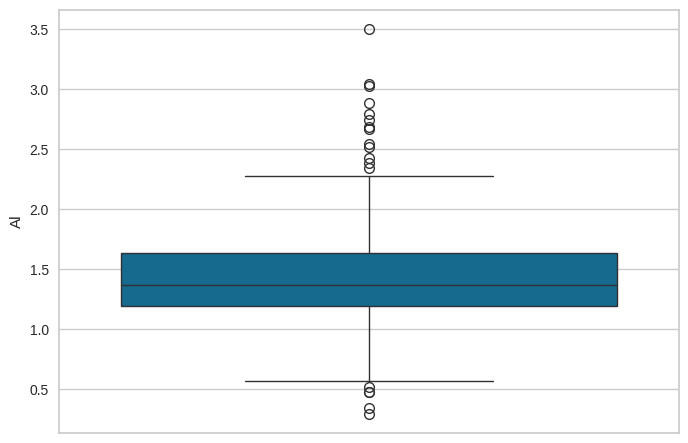

In [28]:
sns.boxplot(df['Al'])
plt.show()

In [29]:
df.shape

(214, 10)

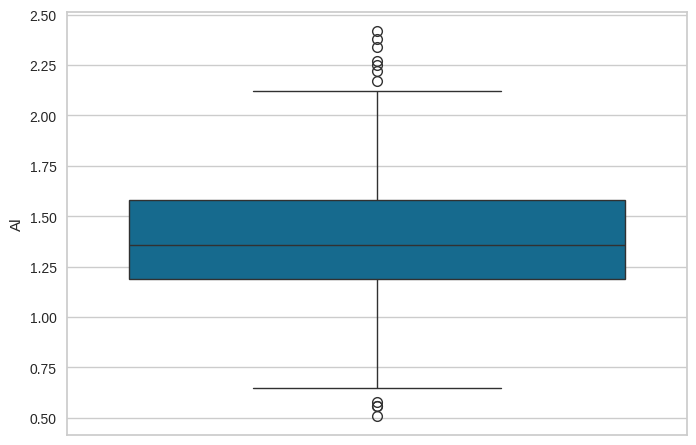

In [33]:
df = df[(df['Al'] > 0.5) & (df['Al'] < 2.5)]

sns.boxplot(df['Al'])
plt.show()

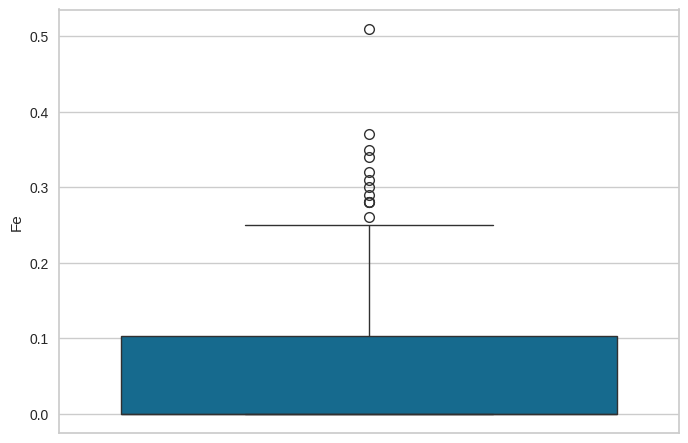

In [36]:
sns.boxplot(df['Fe'])
plt.show()

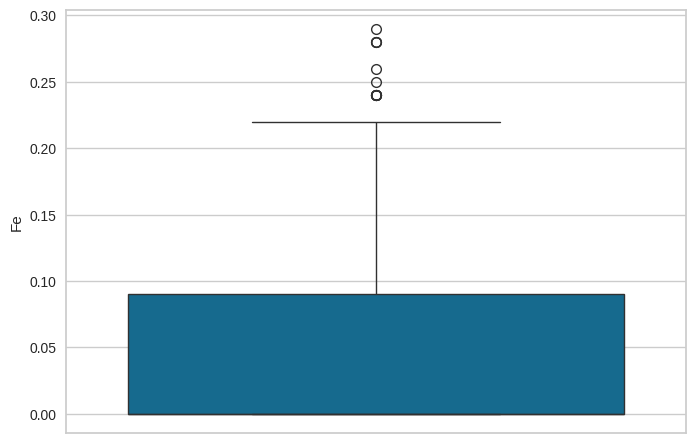

In [37]:
df = df[df['Fe'] < 0.3]

sns.boxplot(df['Fe'])
plt.show()

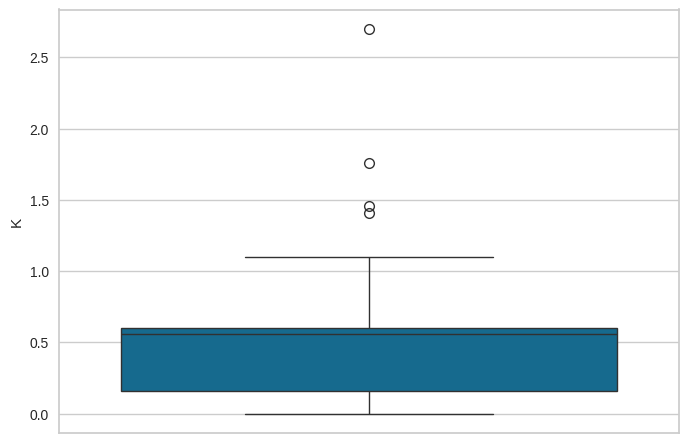

In [38]:
sns.boxplot(df['K'])
plt.show()

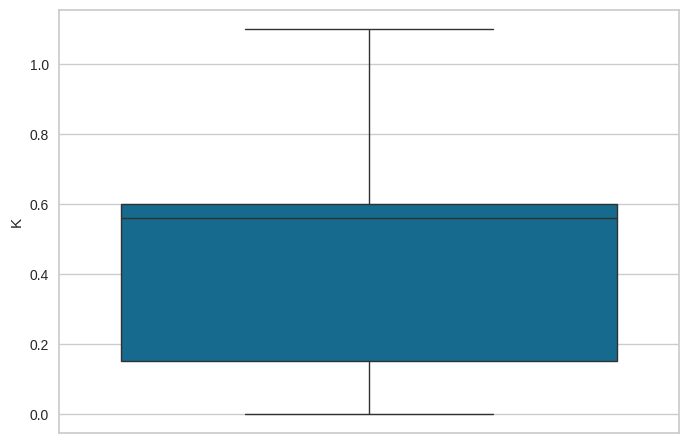

In [39]:
df = df[df['K'] < 1.3]

sns.boxplot(df['K'])
plt.show()

In [43]:
s = setup(df, target = 'Type', session_id = 1212,
           log_experiment = True, experiment_name = 'glass_1')

,Description,Value
0,Session id,1212
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(189, 10)"
5,Transformed data shape,"(189, 10)"
6,Transformed train set shape,"(132, 10)"
7,Transformed test set shape,"(57, 10)"
8,Numeric features,9
9,Preprocess,True


2024/03/02 15:10:07 INFO mlflow.tracking.fluent: Experiment with name 'glass_1' does not exist. Creating a new experiment.


In [44]:
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7863,0.0000,0.7863,0.7477,0.7572,0.6862,0.7004,0.1570
et,Extra Trees Classifier,0.7802,0.0000,0.7802,0.7773,0.7615,0.6864,0.7058,0.1180
lightgbm,Light Gradient Boosting Machine,0.7363,0.0000,0.7363,0.6941,0.6960,0.6154,0.6375,9.1150
gbc,Gradient Boosting Classifier,0.7341,0.0000,0.7341,0.7139,0.7078,0.6165,0.6349,0.4890
dt,Decision Tree Classifier,0.6967,0.0000,0.6967,0.6728,0.6713,0.5684,0.5813,0.0300
lda,Linear Discriminant Analysis,0.6357,0.0000,0.6357,0.6521,0.6104,0.4849,0.5068,0.0500
knn,K Neighbors Classifier,0.6286,0.0000,0.6286,0.5981,0.5917,0.4644,0.4888,0.0380
ridge,Ridge Classifier,0.6143,0.0000,0.6143,0.5690,0.5656,0.4222,0.4518,0.0310
lr,Logistic Regression,0.5835,0.0000,0.5835,0.5338,0.5365,0.3779,0.4014,0.7370
qda,Quadratic Discriminant Analysis,0.5099,0.0000,0.5099,0.4497,0.4584,0.3159,0.3318,0.0390


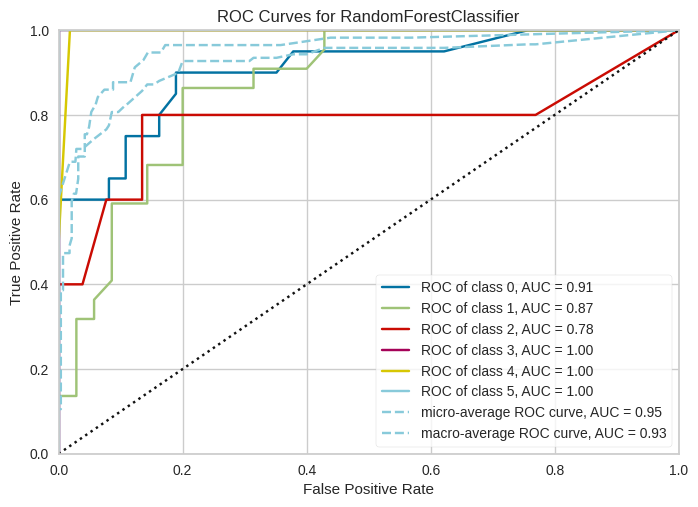

In [45]:
plot_model(model, plot = 'auc')

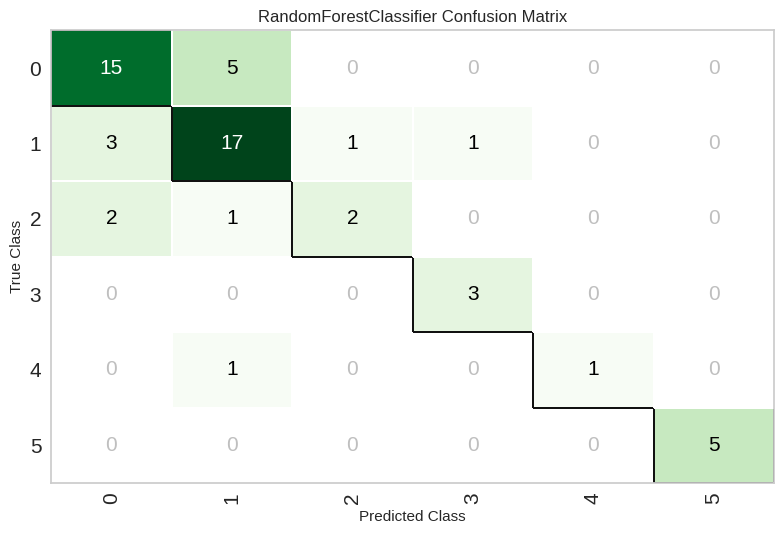

In [46]:
plot_model(model, plot = 'confusion_matrix')

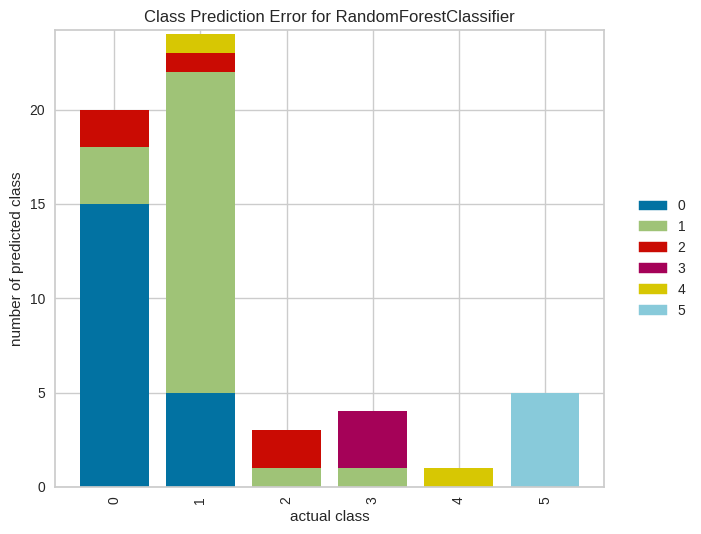

In [47]:
plot_model(model, plot = 'error')

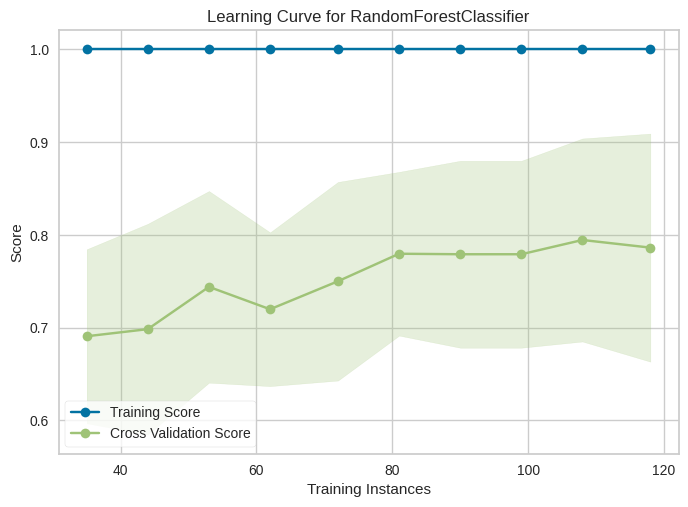

In [48]:
plot_model(model, plot = 'learning')

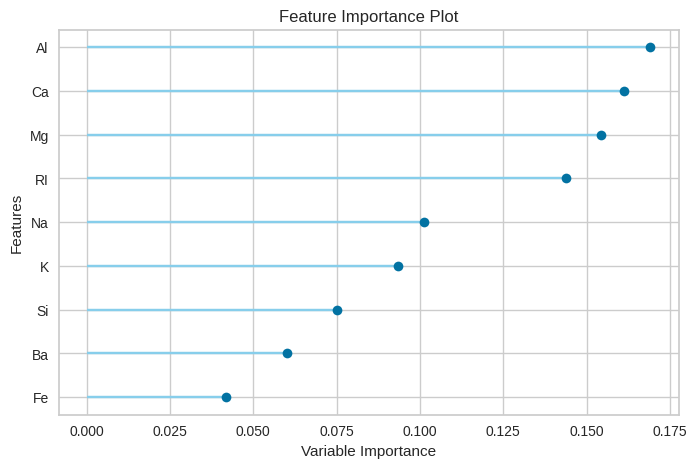

In [49]:
plot_model(model, plot = 'feature')

![](Multiclass_Classification_AutoML.png)